# KNN

K-Nearest Neighbors is a non-parametric model that can be used for classification, binary and multinomial, and for regression. Being non-parametric means that it predicts an output looking at the training data instead of using some learned parameters. This means that the training set needs to be stored.

For the classification task, given a new data example the model look at the k-closests points in the stored dataset and takes the most popular label among these points as the predicted label. For the regression problem, the output value is an average of the k-closests points.

The main hyperparameters of the model are: 

* k: A higher value entails greater computational cost and smoother decision boundaries, a low value might result in overfitting.

* Similarity metric: The distance between points can be computed using euclidean distance, cosine distance, ot other similarity metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")
from models.knn import KNNClassifier, KNNRegressor
from utils.datasets import blobs_classification_dataset
from utils.visualization import plot_decision_boundary

## Multinomial classification

Contrary to logistic regression, the KNN calssification algorithm can manage any number of labels. For instance:

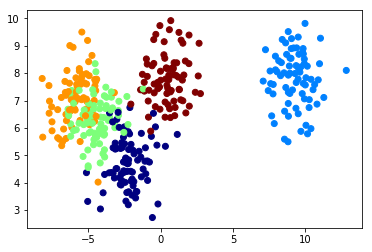

In [2]:
(x_train, y_train), (x_test, y_test) = blobs_classification_dataset(features=2, classes=5, samples=500)

# Visualize
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet')
plt.show()

In [3]:
# Initialize the model.
model = KNNClassifier(X=x_train, y=y_train)

# KNN doesn't needs to fit the data. Predictions can be made "out of the box".
y_hat = model.predict(x_test)


acc = np.mean(y_hat==y_test)

print("Accuracy on the holdout set: %.2f" % acc)

Accuracy on the holdout set: 0.84


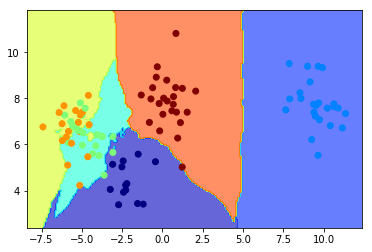

In [4]:
# Visualize decision boundary
ax = plot_decision_boundary(model.predict,
                            x_range=[x_test[:, 0].min()-1, x_test[:, 0].max()+1],
                            y_range=[x_test[:, 1].min()-1, x_test[:, 1].max()+1], classes=5)
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='jet', label='True classes')
plt.show()

### Non lineary-separable data

This model can also generalize well to other kinds of data distribution

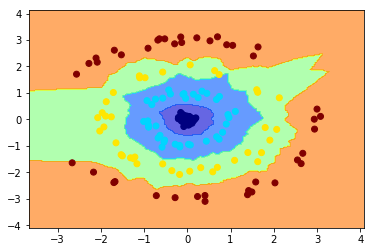

In [5]:
# Load new data
from utils.datasets import radial_classification_dataset
(x_train, y_train), (x_test, y_test) = radial_classification_dataset(classes=4, samples=200)

# Initialize the model.
model = KNNClassifier(X=x_train, y=y_train)

# Visualize decision boundary
ax = plot_decision_boundary(model.predict,
                            x_range=[x_train[:, 0].min()-1, x_train[:, 0].max()+1],
                            y_range=[x_train[:, 1].min()-1, x_train[:, 1].max()+1], classes=4)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='jet', label='True classes')
plt.show()

## Regression

The KNN algorithm can also be used to perform regression.

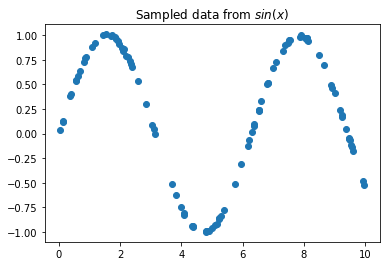

In [6]:
# Generate the data
x_train = np.random.random_sample(100)*10
y_train = np.sin(x_train) + np.random.randn(100)*0.01

# Plot data
plt.plot(x_train, y_train, 'o')
plt.title('Sampled data from $sin(x)$')
plt.show();

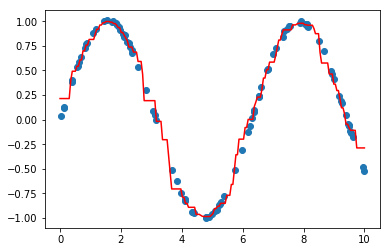

In [7]:
# Initialize regression model
model = KNNRegressor(X=x_train.reshape([-1, 1]), y=y_train)

# Plot regressed line over training data in the original range
x_axis = np.linspace(0, 10, 200)
plt.plot(x_train, y_train, 'o')
plt.plot(x_axis, model.predict(x_axis), color='red')
plt.show()

It may seem that the model learns very well the function, however it only performs well when there is enough close data. This happens when we try to predict values outside the original range.

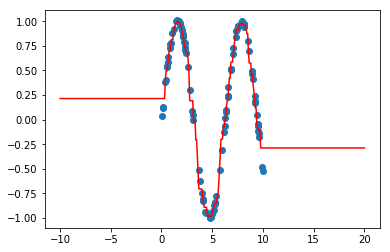

In [8]:
# Plot regressed line over training data along a greater range
x_axis = np.linspace(-10, 20, 400)
plt.plot(x_train, y_train, 'o')
plt.plot(x_axis, model.predict(x_axis), color='red')
plt.show()